In [16]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip list

Package                         Version                  Editable project location
------------------------------- ------------------------ ------------------------------------------------------------------------------
absl-py                         1.4.0
aiohttp                         3.8.4
aiosignal                       1.3.1
ansi2html                       1.8.0
anyio                           3.6.2
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.3
asgiref                         3.5.2
asttokens                       2.2.1
astunparse                      1.6.3
async-timeout                   4.0.2
attrs                           22.2.0
Babel                           2.11.0
backcall                        0.2.0
beautifulsoup4                  4.11.1
bleach                          5.0.1
cachetools                      5.3.0
captum                          0.6.0
certifi                         2022.12.7
cffi        


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import tensorflow as tf
import os

In [19]:
import cv2
import imghdr

In [20]:
data_dir='data'
list_ext=['jpeg','jpg','bmp','png']


In [21]:
os.listdir(os.path.join(data_dir,'goodlookin'))

['-cant-resist-temptation-pointing-fingers-up-looking-extremely-good-178434904.jpg',
 '0x0.jpg',
 '0_I-feel-betrayedEXCLUSIVE-Cristiano-Ronaldo-tells-Piers-Morgan-he-feels-like-hes-being-forced.jpg',
 '10-reasons-why-attractive-people-are-more-successful-according-to-science.jpg',
 '1000x6656.jpg',
 '1051406-gl-1456042322.jpg',
 '1087370-untitled-design-2022-09-07t163425.666.jpg',
 '10883_w_450_658.jpg',
 '109522-107284.jpg',
 '12q0mSTo_400x400.jpg',
 '1413215724408_Image_galleryImage_Mandatory_Credit_Photo_by.jpg',
 '14649-Megan_Fox-brunette-748x561.jpg',
 '14769800-f85a-4add-af4b-79f8f0788d3f.jpg',
 '1490003117-1489768093-1489683703-orlando.jpg',
 '1491861874783-GettyImages-488766751.jpeg',
 '150311135549-jon-kortajarena-male-model.jpg',
 '1505214376433-attractive-cover.jpeg',
 '151670-154933_0.jpg',
 '153478-157068_0.jpg',
 '1679908643038',
 '1679908643041',
 '18-2-380x214.jpg',
 '1K9az8a-7YR32-Ph0DsRjdQ.jpeg',
 '1_2019-Vanity-Fair-Oscar-Party-Hosted-By-Radhika-Jones-Arrivals.jpg',


In [22]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in list_ext:
                print("img not in list path")
                os.remove(image_path)
        except Exception as e:
                print("issue with imaghe {}".format(image_path))
                os.remove(image_path)

img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path
img not in list path


In [23]:
tf.data.Dataset??

In [24]:
import numpy as np
from matplotlib import pyplot as plt 

In [25]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 504 files belonging to 2 classes.


In [26]:
data_iterator=data.as_numpy_iterator()

In [27]:
batch=data_iterator.next()

In [28]:
batch[1]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

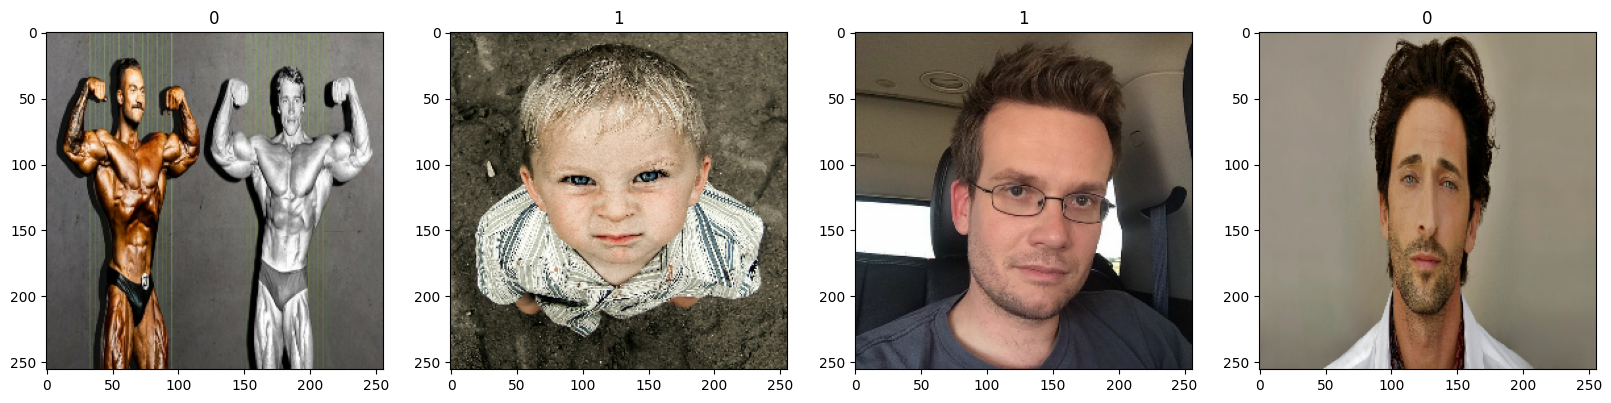

In [29]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [30]:

data=data.map(lambda x,y:(x/255,y))

In [31]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch[0].max()

1.0

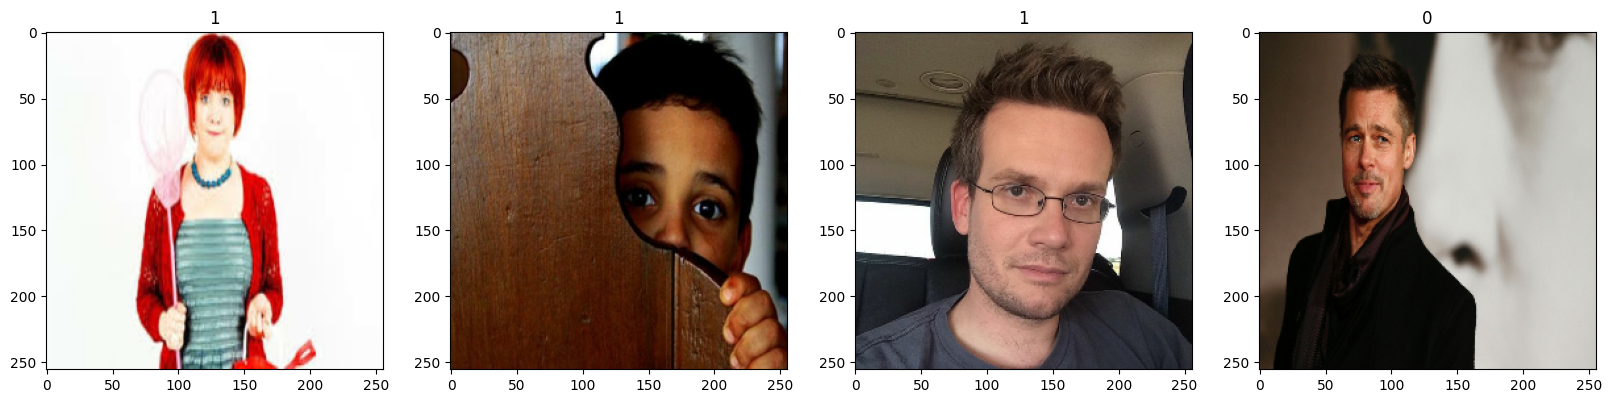

In [32]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [33]:
train=int(len(data)*0.7)
val=int(len(data)*0.2)
test=int(len(data)*0.1)+1

In [34]:
train_data=data.take(train)
val_data=data.skip(train).take(val)
test_data=data.skip(train+val).take(test)

In [35]:
len(train_data)

11

In [36]:
batch[0].shape

(32, 256, 256, 3)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D,Flatten,Reshape

In [38]:
model=Sequential()

In [39]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
          
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
          
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [42]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
history=model.fit(train_data,epochs=15,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/15
11/11 [==============================] - 25s 2s/step - loss: 0.9157 - accuracy: 0.5455 - val_loss: 0.6676 - val_accuracy: 0.6667
Epoch 2/15
11/11 [==============================] - 16s 1s/step - loss: 0.6584 - accuracy: 0.6193 - val_loss: 0.7097 - val_accuracy: 0.5729
Epoch 3/15
11/11 [==============================] - 16s 1s/step - loss: 0.6546 - accuracy: 0.6506 - val_loss: 0.6721 - val_accuracy: 0.5729
Epoch 4/15
11/11 [==============================] - 15s 1s/step - loss: 0.6293 - accuracy: 0.6761 - val_loss: 0.5876 - val_accuracy: 0.7188
Epoch 5/15
11/11 [==============================] - 15s 1s/step - loss: 0.5767 - accuracy: 0.7045 - val_loss: 0.5512 - val_accuracy: 0.7083
Epoch 6/15
11/11 [==============================] - 15s 1s/step - loss: 0.5262 - accuracy: 0.7528 - val_loss: 0.5078 - val_accuracy: 0.7604
Epoch 7/15
11/11 [==============================] - 16s 1s/step - loss: 0.4817 - accuracy: 0.7585 - val_loss: 0.4061 - val_accuracy: 0.8438
Epoch 8/15
11/11 [==

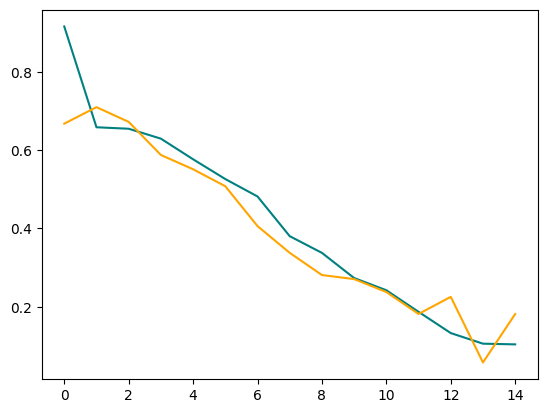

In [44]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
plt.show()

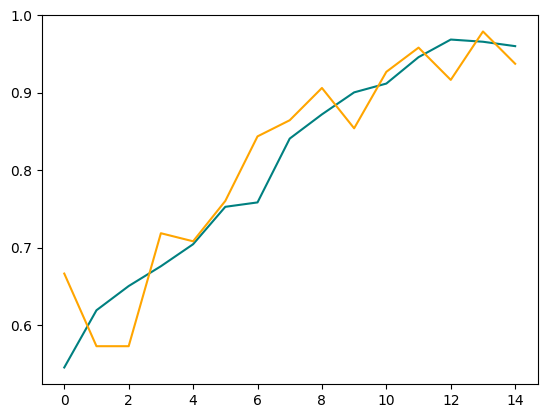

In [45]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
plt.show()

In [46]:
from tensorflow.keras.metrics import BinaryAccuracy
acc=BinaryAccuracy()

In [47]:
for batch in test_data.as_numpy_iterator():
    X,y=batch
    y_hat=model.predict(X)
    acc.update_state(y,y_hat)


1/1 [==============================] - 0s 206ms/step


In [48]:
print(acc.result())


tf.Tensor(0.96428573, shape=(), dtype=float32)


In [ ]:
resize_img=tf.image.resize(img,(256,256))
y_hat=model.predict(np.expand_dims(resize_img/255,0))
print(y_hat)
if y_hat <=0.5:
    print("Good looking person")
else:
    print("Not that great looking ")


In [41]:
data=tf.keras.utils.image_dataset_from_directory('data')
data_dir='data'
list_ext=['jpeg','jpg','bmp','png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in list_ext:
                print("img not in list path")
                os.remove(image_path)
        except Exception as e:
                print("issue with imaghe {}".format(image_path))
                os.remove(image_path)
                
data_iterator=data.as_numpy_iterator()

batch=data_iterator.next()

batch[1]

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
    
data=data.map(lambda x,y:(x/255,y))

data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch[0].max()

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
train=int(len(data)*0.7)
val=int(len(data)*0.2)
test=int(len(data)*0.1)+1

train_data=data.take(train)
val_data=data.skip(train).take(val)
test_data=data.skip(train+val).take(test)

batch[0].shape
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
          
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
          
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

history=model.fit(train_data,epochs=15,validation_data=val_data,callbacks=[tensorboard_callback])

1/1 [==============================] - 0s 23ms/step
[[0.58937764]]
Damn dude I guess looks aint everything is it
